## Assignment 4: Natural language processing

In this assignment, we'll practice reading PDF files, topic modeling, and sentiment analysis.

We'll use [this dataset of emailed comments](https://minneapolis2040.com/media/1411/minneapolis-2040-emailed-responses_062218.pdf) on the Minneapolis 2040 plan. Download the PDF to your computer. If you want some background, [check out the city's website](https://minneapolis2040.com/received-public-comments/).

(1) Open the PDF in Python using `PyPDF2`. Count the number of pages, and put the entire text into a string.

In [88]:
import PyPDF2
path = '/Users/adammb/Desktop/'  # replace with your path
fn = 'minneapolis-2040-emailed-responses_062218.pdf'

# your code here

n_pages = 999 # assign the number of pages to this variable
pdftext = ''  # string of the text

### BEGIN SOLUTION
path = '/Users/adammb/Desktop/'
pdffile = open(path+fn, 'rb')
pdf = PyPDF2.PdfFileReader(pdffile)
n_pages = pdf.getNumPages()

pdftext = ''
for page in pdf.pages:
    pdftext += page.extractText() 

pdffile.close()
### END SOLUTION

In [89]:
print(n_pages)
print('Text is {} characters long'.format(len(pdftext)))

assert n_pages == 199
assert len(pdftext) == 525184

199
Text is 525184 characters long


(2) If you take a look at the text, it seems that the different comments are separated by the `"\n Content"` string. 

Split your text into a list of comments using this separator. (This method isn't perfect, but it's a good first approximation.)

Note that since our splitting relies on the `\n` newline character, we need to split before cleaning up the whitespace.

In [93]:
comment_list = []  # your list of comments

### BEGIN SOLUTION
comment_list = pdftext.split('\n Content')
### END SOLUTION

In [94]:
print(len(comment_list))
assert len(comment_list) == 193

193


(3) Now, let's clean up each of these comments. 

First, create a function that removes excess whitespace, punctuation, and stop words from a string. Also remove the following words that are in pretty much every comment: city, plan, Minneapolis, emailed, comments

Your function should take a string and return a cleaned-up string in the form of a list of words.

*Hint*: You'll first want to use regex to remove the excess whitespace and punctuation (and then whitespace again). Then create a list of words using `split()` and remove the stopwords. 

(Don't apply the function to your comment list yet — that's the next question.)

In [97]:
def clean_string(text):
    # your code here
    return cleaned_list_of_words


### BEGIN SOLUTION
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

swords = [re.sub(r"[^A-z\s]", "", sword) for sword in stopwords.words('english')]
swords += ['city', 'plan', 'minneapolis', 'emailed', 'comments']

def clean_string(text):
    # remove whitespace
    text = re.sub(r"\s+", " ", text)
    
    # remove punctuation
    text = re.sub(r"[^A-z\s]", "", text)

    # remove whitespace again
    text = re.sub(r"\s+", " ", text)
    
    cleaned_list_of_words = [word for word in word_tokenize(text.lower()) if word not in swords]

    
    return cleaned_list_of_words

### END SOLUTION

In [98]:
newstr = clean_string('A    very dirty 934\t999 string for minneapolis  plan IS like  this')

print(newstr)
assert newstr == ['dirty', 'string', 'like']

['dirty', 'string', 'like']


(4) Now, use your function to clean up the list of comments. Return a new list of cleaned comments.

*Hint*: a list comprehension is the simplest way to do this. But you could also do a regular `for` loop over your `comment_list`.

In [99]:
cleaned_comment_list = []  # your code here

### BEGIN SOLUTION
cleaned_comment_list = [clean_string(cs) for cs in comment_list]

### END SOLUTION

In [100]:
print(cleaned_comment_list[9][:10])

assert cleaned_comment_list[9][:10] == ['writing', 'express', 'opposition', 'current', 'proposal',
 'fourplex', 'zoning', 'two', 'specific', 'concerns']

['writing', 'express', 'opposition', 'current', 'proposal', 'fourplex', 'zoning', 'two', 'specific', 'concerns']


(5) Estimate an LDA topic model on your cleaned comment list. You could use the same parameters for `num_topics`, `alpha` and `eta` as we did in class. The challenge problem asks you to go deeper and experiment with different values, but feel free to do so here if you are inclined.

Visualize your topic model using `pyLDAvis`.

In [101]:
### BEGIN SOLUTION

import gensim
dictionary = gensim.corpora.Dictionary(cleaned_comment_list)
corpus = [dictionary.doc2bow(wl) for wl in cleaned_comment_list]
model = gensim.models.LdaMulticore(corpus, id2word=dictionary, num_topics=10, alpha = 0.7, eta=0.5)


import pyLDAvis
import pyLDAvis.gensim_models   # note that in previous versions this was called pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(model, corpus, dictionary)

### END SOLUTION

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.003331 -0.000604       1        1  27.675322
5     -0.001646  0.001001       2        1  24.560784
2     -0.002930  0.000376       3        1  21.597490
0     -0.000690  0.000449       4        1   5.999161
3      0.000641 -0.000319       5        1   5.290407
4      0.000280 -0.001468       6        1   4.365017
8     -0.000021 -0.001129       7        1   4.038708
9      0.000790  0.001167       8        1   2.608989
6      0.000636  0.000459       9        1   2.261889
1      0.006271  0.000068      10        1   1.602234, topic_info=              Term        Freq       Total Category  logprob  loglift
466        housing  355.000000  355.000000  Default  30.0000  30.0000
61    neighborhood  153.000000  153.000000  Default  29.0000  29.0000
651        council  203.000000  203.000000  Default  28.0000  28.0000
1240           yes   39.000000   39.000000  Default  27.0000  27.0000
364           time  151.000000  151.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
54            make    0.935127   64.706485  Topic10  -6.6012  -0.1032
651        council    1.603334  203.764080  Topic10  -6.0621  -0.7111
4         received    1.058900   92.398169  Topic10  -6.4769  -0.3351
527          units    1.072786   97.560684  Topic10  -6.4639  -0.3764
234         public    1.025226   95.675521  Topic10  -6.5092  -0.4023

[795 rows x 6 columns], token_table=      Topic      Freq                            Term
term                                                 
3123      1  0.307303  ______________________________
3123      2  0.230477  ______________________________
3123      3  0.307303  ______________________________
3123      4  0.076826  ______________________________
3123      5  0.076826  ______________________________
...     ...       ...                             ...
417       6  0.056224                          zoning
417       7  0.042168                          zoning
417       8  0.028112                          zoning
417       9  0.014056                          zoning
417      10  0.014056                          zoning

[2637 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 3, 1, 4, 5, 9, 10, 7, 2])

(6) Now, it's time for some sentiment analysis!

Write a function that calculates the sentiment score (polarity) for each comment in your (cleaned) list. 

The function should take a list of words and return a score.

*Hint*: Remember the `join()` function!

In [102]:
def get_sentiment(list_of_words):
    # your code here
    return polarity

### BEGIN SOLUTION


from textblob import TextBlob
def get_sentiment(list_of_words):
    joined_list = ' '.join(list_of_words)
    polarity = TextBlob(joined_list).sentiment.polarity
    return polarity

### END SOLUTION

In [70]:
print(get_sentiment(['I', 'hate', 'the', 'idea', 'of', 'higher', 'densities']))
assert get_sentiment(['I', 'hate', 'the', 'idea', 'of', 'higher', 'densities'])==-0.275

-0.275


(7) Now, apply the sentiment score to every string in your list (`cleaned_comment_list`). Create a new list of polarities. 

*Hint*: another list comprehension might be in order.

In [103]:
sentiment_scores = []  # your list here

### BEGIN SOLUTION
sentiment_scores = [get_sentiment(cs) for cs in cleaned_comment_list]
### END SOLUTION

In [104]:
import numpy as np
print(np.round(sentiment_scores[9], 2))
assert np.round(sentiment_scores[9], 2)==0.06

0.06


(8) Finally, plot a histogram of your scores. Make sure to add axis labels where appropriate.

Text(0, 0.5, 'Number of comments')

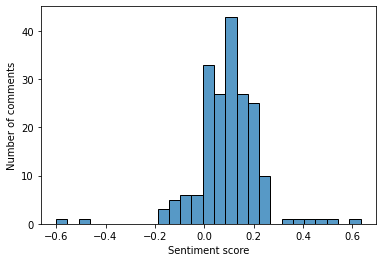

In [106]:
# your code here

### BEGIN SOLUTION
import seaborn as sns
ax = sns.histplot(sentiment_scores)
ax.set_xlabel('Sentiment score')
ax.set_ylabel('Number of comments')
### END SOLUTION

# Challenge Problem
Remember, you need to do at least two of these challenge problems this quarter.

This challenge problem is open ended for you to take in a direction that you are most interested in. Here are some suggestions:

* For the topic modeling, experiment with `num_topics`, `alpha` and `eta` to get a meaningful set of topics. You might want to clean the data further as well, e.g. through lemmatizing and dropping other words (like we did for "Minneapolis")
* Analyze and plot the sentiment scores for posts that mention different keywords. Do you see a difference for those that mention "density," "zoning", "housing," "parking," etc.? Qualitatively, do the sentiment scores make intuitive sense (e.g. if you examine the most-positive and most-negative comments)?
* Until now, we've only considered the emailed comments. Compare the topics or sentiment scores to public comments received through a different channel ([all comments are here](https://minneapolis2040.com/received-public-comments/)). *Hint*: you could create a mega-function that takes the filename as the argument, and returns a set of topics and/or sentiment scores.
* Other ideas?

In all cases, write some brief interpretation in a markdown cell.